In [121]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import math

# Титаник

In [122]:
data = pd.read_csv('titanic.csv')

In [123]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### используем только целевую функицю: выжил или нет в зависимости от пола пассажира

In [124]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [125]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [126]:
pd.crosstab(data['Survived'], data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [127]:
len(data)

891

In [128]:
round(pd.crosstab(data['Survived'], data['Sex'])/len(data),2)

Sex,female,male
Survived,,
0,0.09,0.53
1,0.26,0.12


AxesSubplot(0.125,0.125;0.775x0.755)


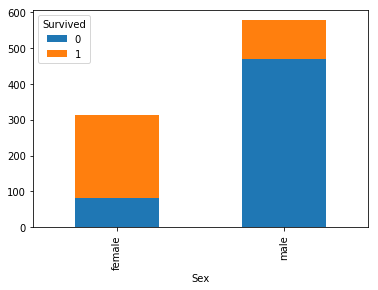

In [129]:
print(data.pivot_table('PassengerId', 
                       'Sex', 'Survived', 
                       'count').plot(kind='bar', stacked=True))

In [131]:
x = pd.get_dummies(data['Sex'].values, columns=['Sex']).values
y = data['Survived'].values

model = LogisticRegression(C=1e10, solver='lbfgs')
model.fit(x, y)
print(model.coef_)
print(model.intercept_)

print(model.coef_ + model.intercept_)

[[ 1.19010003 -1.32361017]]
[-0.13351015]
[[ 1.05658988 -1.45712032]]


In [132]:
pd.crosstab(data['Survived'], data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [89]:
len(data)

891

In [120]:
math.log((233+109)/(81))

1.4403615823901663

In [116]:
math.log((233+109)/(81+468))

-0.4732877044469254

In [118]:
math.log((233)/(81))

1.0565892988932617

In [117]:
math.log((109)/(468))

-1.457120413688503